In [161]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [162]:
cData = pd.read_excel('compactiv.xlsx')

In [164]:
cData.shape

(8192, 22)

In [165]:
cData.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [166]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [167]:
cData['runqsz'].unique()

array(['CPU_Bound', 'Not_CPU_Bound'], dtype=object)

In [168]:
cData.dtypes

lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object

In [169]:
cData.dtypes.value_counts()

float64    13
int64       8
object      1
dtype: int64

In [170]:
cData['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

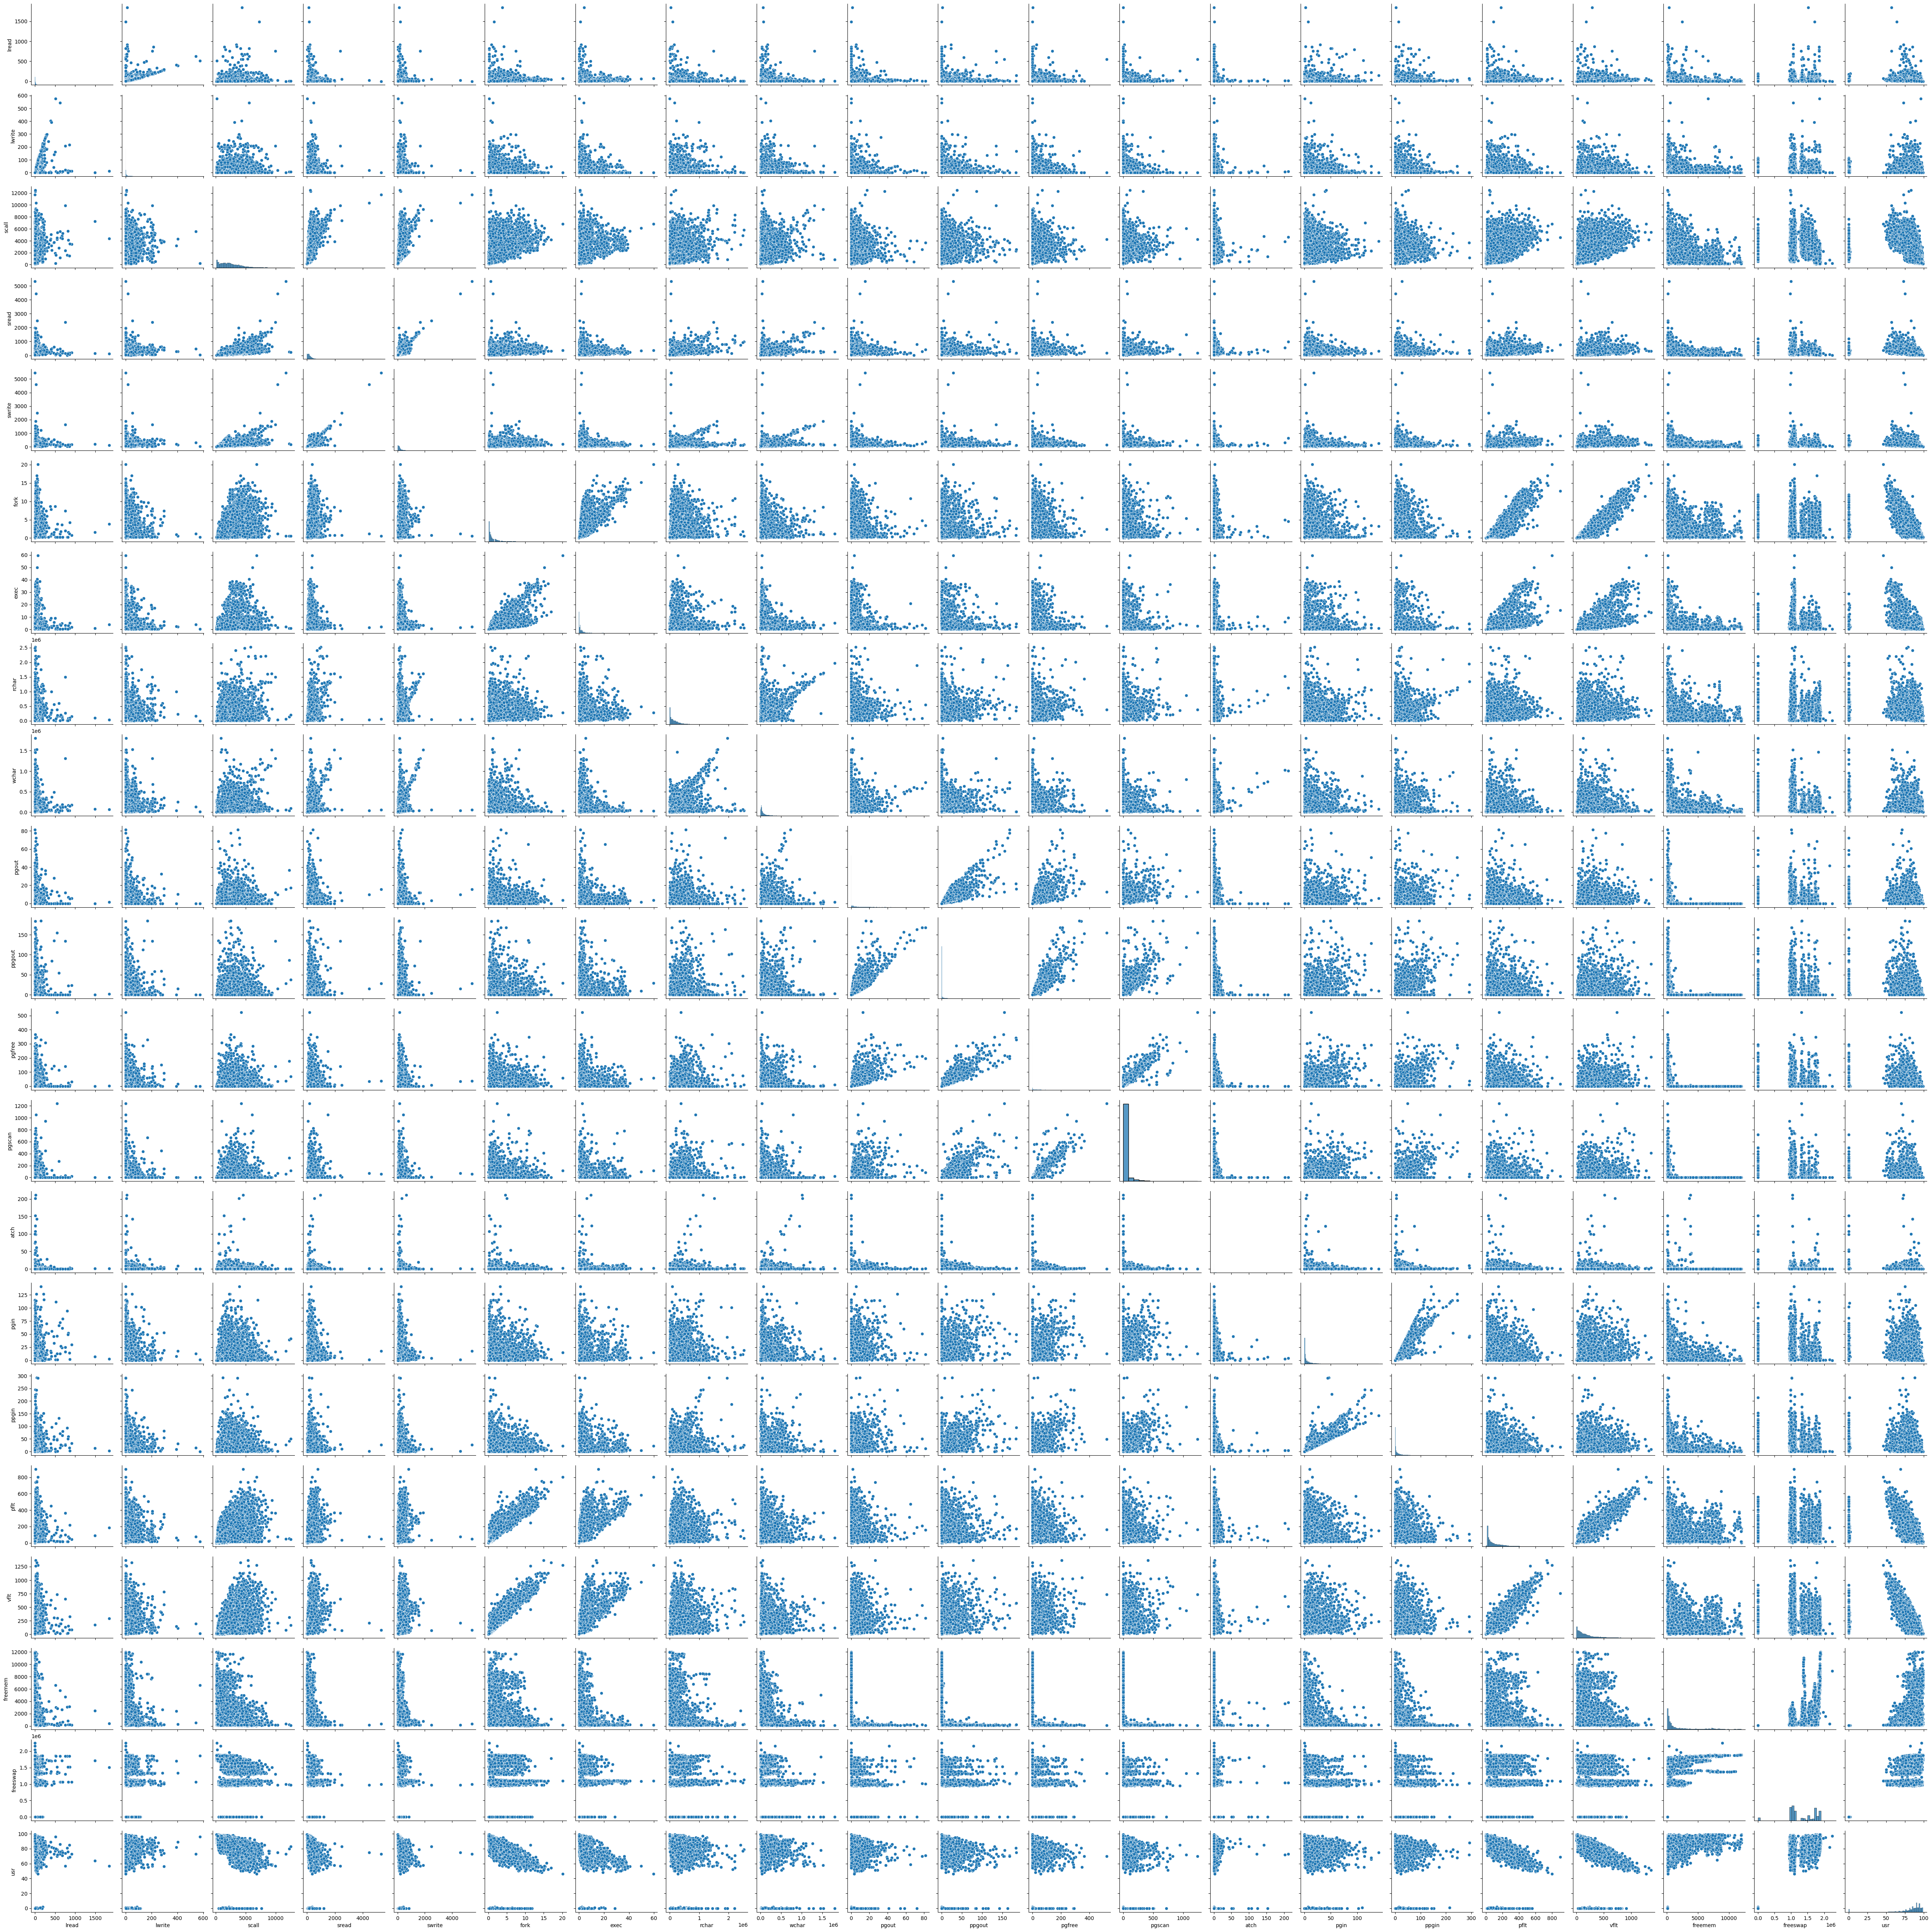

In [171]:
sns.pairplot(cData)

In [175]:
cData.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [176]:
cData.duplicated().sum()

0

In [177]:
for column_name in cData.columns:
    column = cData[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  lread  is :  675
Count of zeros in column  lwrite  is :  2684
Count of zeros in column  scall  is :  0
Count of zeros in column  sread  is :  0
Count of zeros in column  swrite  is :  0
Count of zeros in column  fork  is :  21
Count of zeros in column  exec  is :  21
Count of zeros in column  rchar  is :  0
Count of zeros in column  wchar  is :  0
Count of zeros in column  pgout  is :  4878
Count of zeros in column  ppgout  is :  4878
Count of zeros in column  pgfree  is :  4869
Count of zeros in column  pgscan  is :  6448
Count of zeros in column  atch  is :  4575
Count of zeros in column  pgin  is :  1220
Count of zeros in column  ppgin  is :  1220
Count of zeros in column  pflt  is :  3
Count of zeros in column  vflt  is :  0
Count of zeros in column  runqsz  is :  0
Count of zeros in column  freemem  is :  0
Count of zeros in column  freeswap  is :  0
Count of zeros in column  usr  is :  283


C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_9516\727079455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cData.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

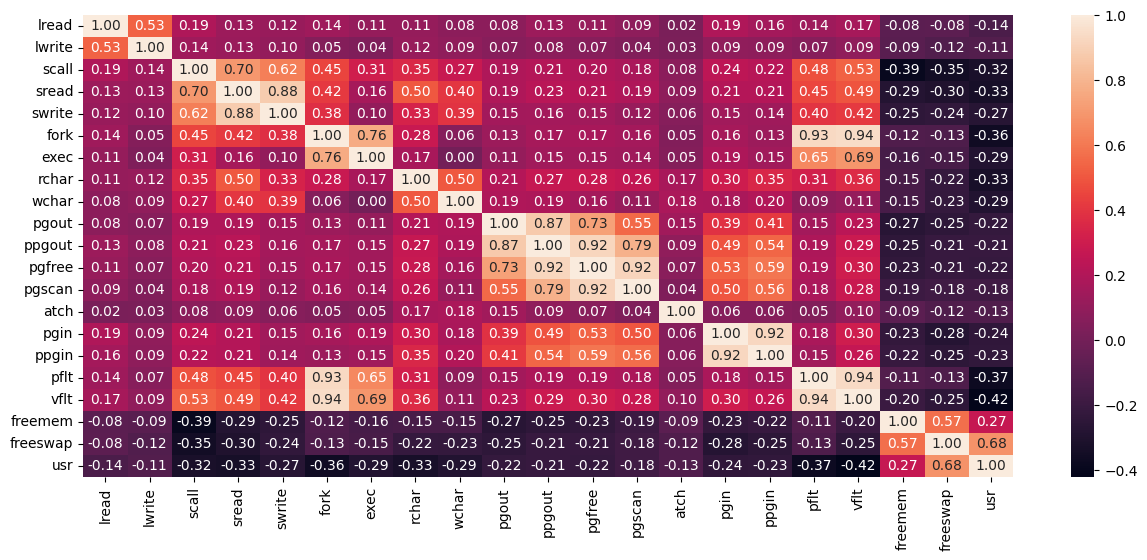

In [178]:
plt.figure(figsize=(15,6))
sns.heatmap(cData.corr(), annot=True, fmt=".2f")

In [179]:
cData.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

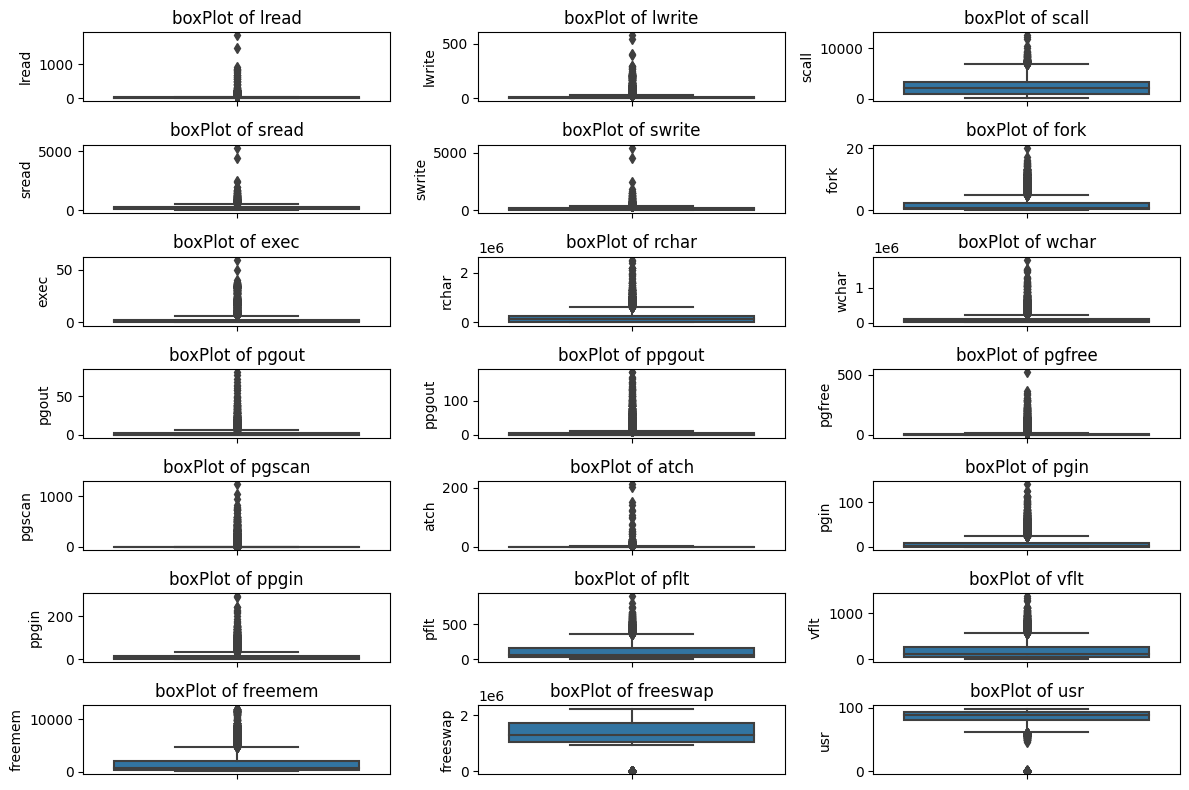

In [180]:
plt.figure(figsize=(12,8))

dfModifed=cData.drop(['runqsz'], axis=1)
feature_list=dfModifed.columns
for i in range(len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=dfModifed[feature_list[i]], data=dfModifed)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

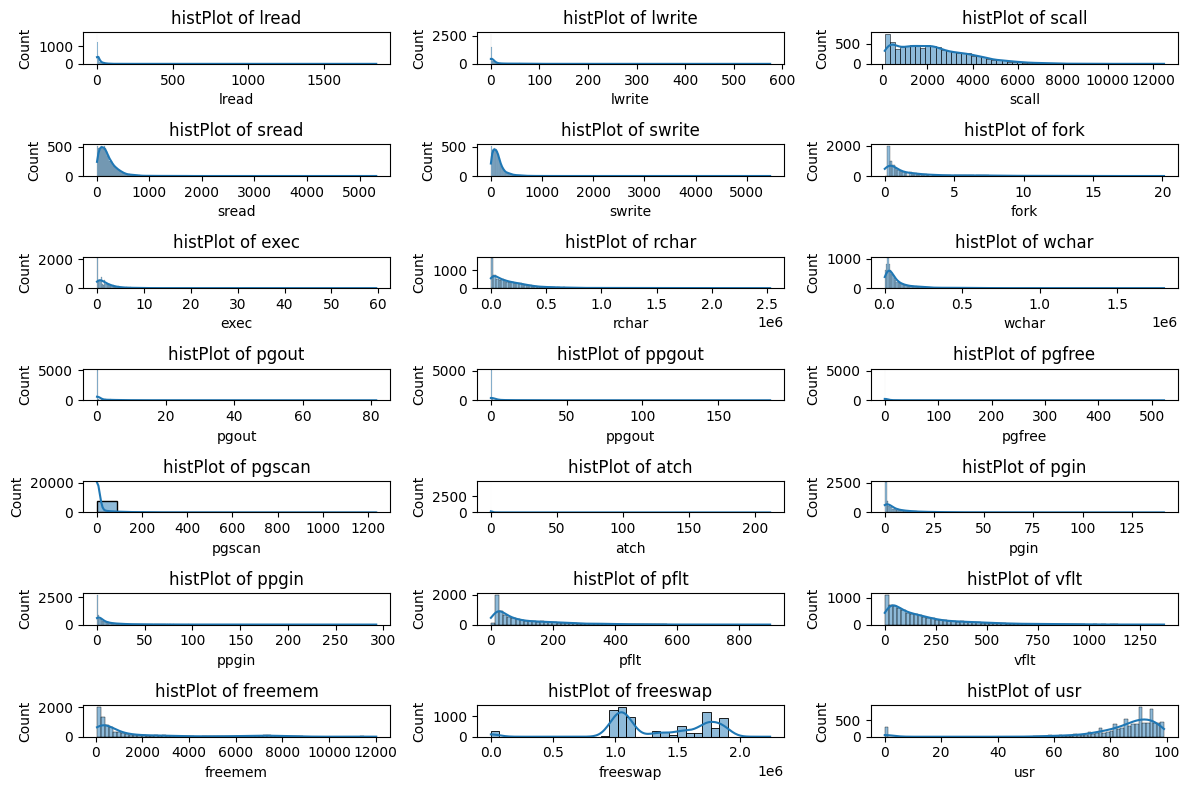

In [181]:
plt.figure(figsize=(12,8))
feature_list1=dfModifed.columns
for i in range(len(feature_list1)):
    plt.subplot(7,3,i+1)
    sns.histplot(x=dfModifed[feature_list1[i]], kde=True)
    plt.title('histPlot of {}'.format(feature_list1[i]))
    plt.tight_layout()

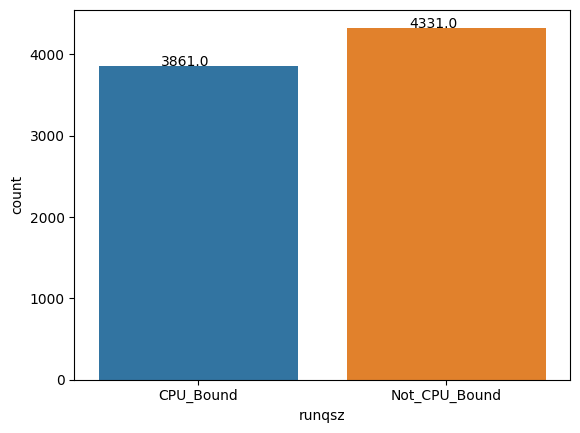

In [182]:
ax = sns.countplot(x='runqsz', data=cData)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

In [183]:
cData.isnull().sum()
#cData['income'].fillna((cData['income'].mean()), inplace=True)

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [184]:
cData['rchar'].fillna((cData['rchar'].mean()), inplace=True)
cData['wchar'].fillna((cData['wchar'].mean()), inplace=True)

In [185]:
cData.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [186]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [187]:
dfModifed=cData.drop(['runqsz'], axis=1)
feature_list=dfModifed.columns
for i in feature_list:
    LL, UL = remove_outlier(dfModifed[i])
    dfModifed[i] = np.where(dfModifed[i] > UL, UL, dfModifed[i])
    dfModifed[i] = np.where(dfModifed[i] < LL, LL, dfModifed[i])

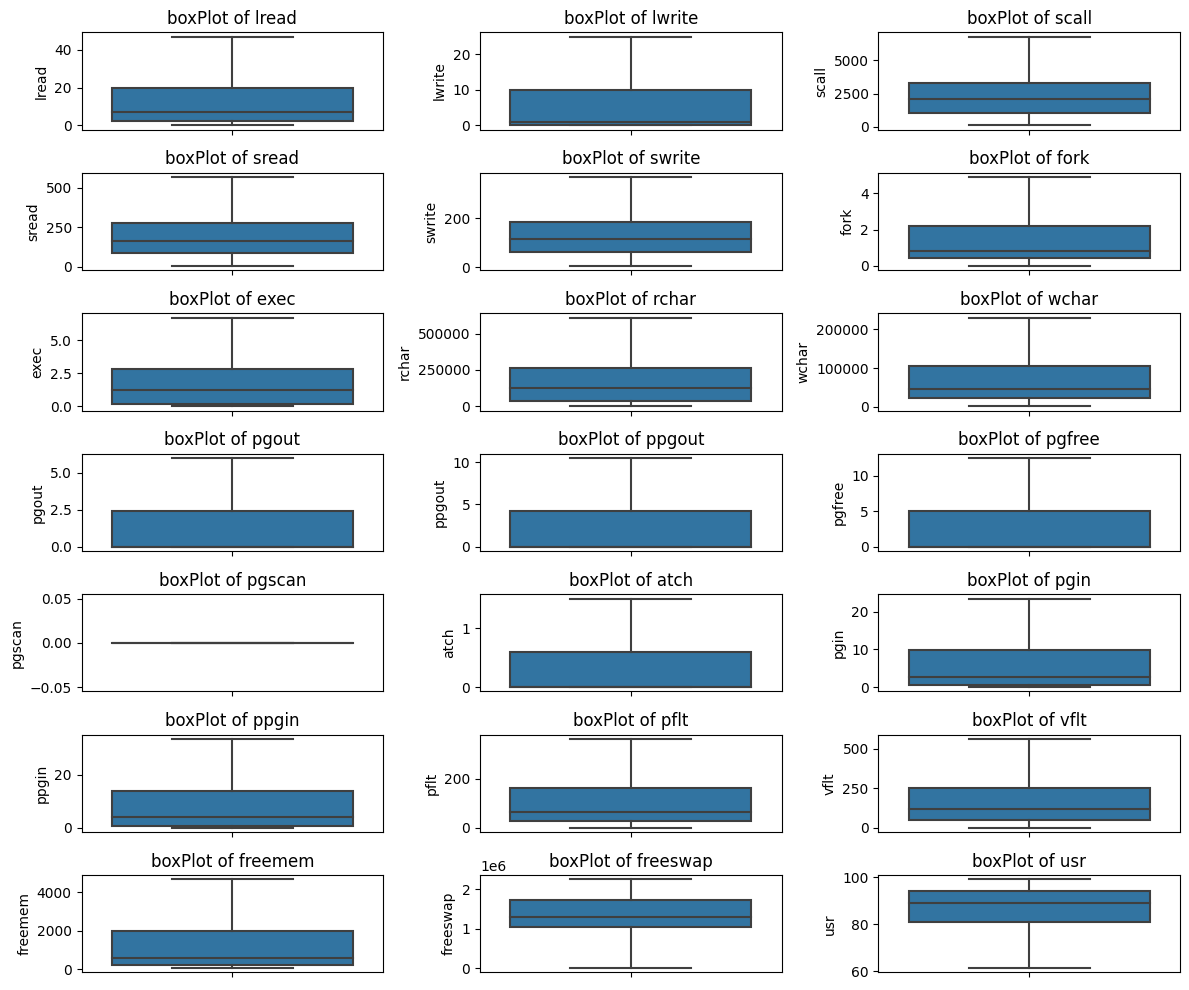

In [188]:
plt.figure(figsize=(12,10))
feature_list=dfModifed.columns
for i in range(len(feature_list)):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=dfModifed[feature_list[i]], data=dfModifed)
    plt.title('boxPlot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [189]:
cData["runqsz"] = cData["runqsz"].replace({'CPU_Bound': 0, 'Not_CPU_Bound':1})

In [190]:
cData['runqsz'].unique()

array([0, 1], dtype=int64)

In [191]:
# independent variables
X = cData.drop(["usr"], axis=1)
# dependent variable
y = cData[["usr"]]

In [192]:
X.head()

lread  lwrite  scall  sread  swrite  fork  exec          rchar    wchar  \
0      1       0   2147     79      68   0.2   0.2   40671.000000  53995.0   
1      0       0    170     18      21   0.2   0.2     448.000000   8385.0   
2     15       3   2162    159     119   2.0   2.4  197385.728363  31950.0   
3      0       0    160     12      16   0.2   0.2  197385.728363   8670.0   
4      5       1    330     39      38   0.4   0.4  197385.728363  12185.0   

   pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  \
0    0.0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40       0   
1    0.0  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83       1   
2    0.0  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20       1   
3    0.0  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80       1   
4    0.0  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60       1   

   freemem  freeswap  
0     4670   1730946  
1     7278   1869002  
2      702   1021237  
3     7248   1863704  
4      633   1760253  

[5 rows x 21 columns]

In [193]:
y.head()

usr
0   95
1   97
2   87
3   98
4   90

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [200]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [201]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.019898242591582342
The coefficient for lwrite is 0.004822549499005826
The coefficient for scall is 0.0010078328708177846
The coefficient for sread is -0.00042925110899032817
The coefficient for swrite is -0.0020785052844854283
The coefficient for fork is -1.721635260301748
The coefficient for exec is -0.08962572330407521
The coefficient for rchar is -4.114249883094468e-06
The coefficient for wchar is -1.1603100029289946e-05
The coefficient for pgout is -0.17414405160284666
The coefficient for ppgout is 0.09896424632675815
The coefficient for pgfree is -0.0702837828644868
The coefficient for pgscan is 0.008611010098028173
The coefficient for atch is -0.07829685978947061
The coefficient for pgin is 0.09136880232552246
The coefficient for ppgin is -0.0593593716268139
The coefficient for pflt is -0.04150261126432213
The coefficient for vflt is 0.022282136803892492
The coefficient for runqsz is 7.788368806940666
The coefficient for freemem is -0.0016166383185

In [202]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 44.64681588526172


In [203]:
# R square on training data
regression_model.score(X_train, y_train)

0.6428635339285307

In [204]:
# R square on testing data
regression_model.score(X_test, y_test)

0.6311655542667606

In [206]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(mean_squared_error(y_train,predicted_train))

10.812852066268919

In [207]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted_test))

11.59482423619469

### Linear Regression using statsmodels(OLS)

In [209]:
print(X_train.head())

      lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
694       1       1   1345    223     192   0.6   0.6  198703.0  293578.0   
5535      1       1   1429     87      67   0.2   0.2    7163.0   24842.0   
4244     49      71   3273    225     180   0.6   0.4   83246.0   53705.0   
2472     13       8   4349    300     191   2.8   3.0   96009.0   70467.0   
7052     17      23    225     13      13   0.4   1.6   17132.0   12514.0   

      pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  \
694    0.60  ...   23.40    56.4  2.60  3.80   7.40   28.20   56.60       0   
5535   0.00  ...    0.00     0.0  0.00  1.60   1.60   15.77   30.74       1   
4244   5.39  ...    7.19     0.0  2.79  3.99   4.59   59.88   74.05       0   
2472   0.00  ...    0.00     0.0  0.00  2.80   3.20  129.00  236.80       0   
7052   0.00  ...    0.00     0.0  0.00  0.00   0.00   19.80   23.80       1   

      freemem  freeswap  
694       121   1375446  
5535     1

In [210]:
print(X_test.head())

      lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
3894     27      39   1252     53     118   0.2   0.2   26592.0   54394.0   
4276      1       0    996     85      55   0.4   0.4   16667.0   36431.0   
3414      9       7   1530    247     135   0.4   0.4   14513.0   61905.0   
4165     32       4   3243    182     140   5.2   5.6  337517.0   94832.0   
7385     16       3   5017    259     249   2.8   1.4   73537.0  237547.0   

      pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  \
3894    0.0  ...     0.0     0.0   0.0   0.4    0.6   19.44   20.04       1   
4276    0.0  ...     0.0     0.0   0.0   1.0    1.4   35.53   52.10       1   
3414   13.8  ...    30.4    24.2  10.4  14.8   18.4   26.80  186.20       0   
4165    0.8  ...     1.0     0.0   1.4   4.6    7.0  250.60  420.20       0   
7385    0.0  ...     0.0     0.0   0.0   5.6    5.8  142.80  276.20       0   

      freemem  freeswap  
3894     7762   1875466  
4276     2

In [212]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)


In [213]:
model = sm.OLS(y_train,X_train).fit()
model

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        14:26:36   Log-Likelihood:                -21787.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6468      0.746     59.838      0.000      43.184      46.110
lread         -0.0199      0.003     -6.217      0.000      -0.026      -0.014
lwrite         0.0048      0.006      0.799      0.424      -0.007       0.017
scall          0.0010      0.000      7.449      0.000       0.001       0.001
sread         -0.0004      0.002     -0.234      0.815      -0.004       0.003
swrite        -0.0021      0.002     -1.037      0.300      -0.006       0.002
fork          -1.7216      0.244     -7.050      0.000      -2.200      -1.243
exec          -0.0896      0.048     -1.879      0.060      -0.183       0.004
rchar      -4.114e-06   8.29e-07     -4.961      0.000   -5.74e-06   -2.49e-06
wchar       -1.16e-05   1.28e-06     -9.091      0.000   -1.41e-05    -9.1e-06
pgout         -0.1741      0.064     -2.721      0.007      -0.300      -0.049
ppgout         0.0990      0.037      2.702      0.007       0.027       0.171
pgfree        -0.0703      0.020     -3.505      0.000      -0.110      -0.031
pgscan         0.0086      0.006      1.361      0.174      -0.004       0.021
atch          -0.0783      0.027     -2.939      0.003      -0.131      -0.026
pgin           0.0914      0.029      3.107      0.002       0.034       0.149
ppgin         -0.0594      0.019     -3.127      0.002      -0.097      -0.022
pflt          -0.0415      0.004     -9.696      0.000      -0.050      -0.033
vflt           0.0223      0.003      6.665      0.000       0.016       0.029
runqsz         7.7884      0.303     25.684      0.000       7.194       8.383
freemem       -0.0016   7.53e-05    -21.482      0.000      -0.002      -0.001
freeswap    3.219e-05   4.53e-07     70.984      0.000    3.13e-05    3.31e-05
==============================================================================
Omnibus:                     1507.116   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4767.078
Skew:                          -1.333   Prob(JB):                         0.00
Kurtosis:                       6.584   Cond. No.                     7.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        13:27:15   Log-Likelihood:                -21787.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6468      0.746     59.838      0.0

In [223]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=mean_squared_error(y_train,predicted_train)

In [224]:
np.sqrt(mse) #RMSE on train 

10.812852066268919

In [ ]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [219]:
#Calculate MSE on test
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

11.594824236194718

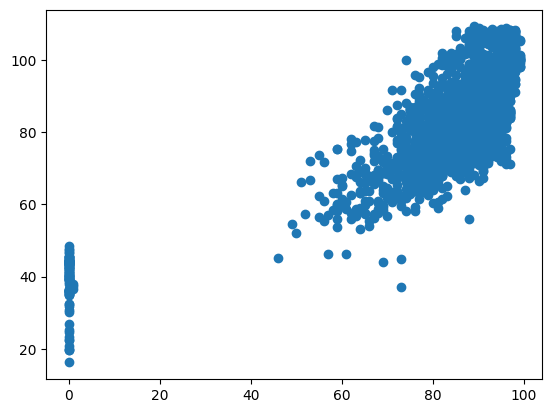

In [220]:
plt.scatter(y_test, y_pred)
plt.show()

In [221]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(44.65) * const + (-0.02) * lread + (0.0) * lwrite + (0.0) * scall + (-0.0) * sread + (-0.0) * swrite + (-1.72) * fork + (-0.09) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.17) * pgout + (0.1) * ppgout + (-0.07) * pgfree + (0.01) * pgscan + (-0.08) * atch + (0.09) * pgin + (-0.06) * ppgin + (-0.04) * pflt + (0.02) * vflt + (7.79) * runqsz + (-0.0) * freemem + (0.0) * freeswap + 

In [222]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       27.197564
lread        1.472623
lwrite       1.405926
scall        2.414381
sread        6.835552
swrite       5.319464
fork        18.210272
exec         3.059844
rchar        1.973395
wchar        1.552883
pgout        5.776040
ppgout      15.906861
pgfree      20.437659
pgscan       9.237220
atch         1.087545
pgin         8.074840
ppgin        8.670888
pflt        11.834194
vflt        20.230202
runqsz       1.119032
freemem      1.677345
freeswap     1.761210
dtype: float64

